In [8]:
import numpy as np
import scipy.linalg as sl

**Iterative methods to solve a matrix**

Iterative methods start with an initial guess at x0 and improve this producing 
For the exact answer to the matrix system Ax=b, the residual vector r = Ax-b is equal to zero. 

The iterative procedure, we can use the norm of the residual vector rk = Axk - b based on the approximate solution xk.
The norm ||rk|| is a measure of how close we are to solving the equation, expressing this as a single number. 

**Jacobi's Method**

For a matrix system
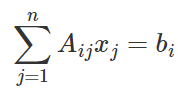

Pull out the term involving xi
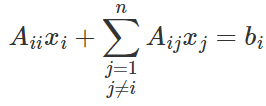

Rearrange to produce an iteration formula for x:

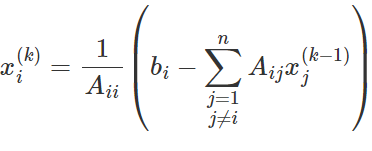

In [12]:
def jacobi(A, b, maxit=500, tol=1.e-6):
    m, n = A.shape
    x = np.zeros(A.shape[0])
    residuals = []
    for k in range(maxit):
        x_new = np.zeros(A.shape[0])
        for i in range(m):
            x_new[i] = (1/A[i,i]) * (b[i] - np.dot(A[i, :i], x[:i]) - np.dot(A[i,i+1:], x[i+1:]))
        x = x_new
        residual = sl.norm(A@x - b)
        residuals.append(residual)
        if (residual < tol): break
    return x, residuals

**Gauss-Seidel's Method**

Gauss-Seidel's method updates Jacobi's method using the updated components of the solution vector, when they become available. 
This overwrites the entries of x as they are updated, whereas in Jacobi we only overwrite the old entries once we have finished with each iteration.

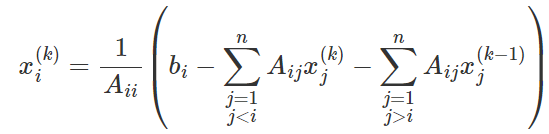

In [17]:
def gauss_seidel(A, b, maxit=500, tol=1.e-6):
    m, n = A.shape
    x = np.zeros(A.shape[0])
    residuals = []
    for k in range(maxit):
        for i in range(m):
            x[i] = (1/A[i,i]) * (b[i] - np.dot(A[i,:i], x[:i]) - np.dot(A[i,i+1:], x[i+1:]))
        
        residual = sl.norm(A@x-b)
        residuals.append(residual)
        if (residual < tol): break
    
    return x, residuals

In [18]:
A = np.array([[10., 2., 3., 5.],
                 [1., 14., 6., 2.],
                 [-1., 4., 16.,-4],
                 [5. ,4. ,3. ,11.]])
b = np.array([1., 2., 3., 4.])

# Check gauss_seidel solution
# agrees with multiplying through by the inverse matrix
print("Is our algorithm working?", np.allclose(sl.inv(A)@b, gauss_seidel(A, b)[0]))

Is our algorithm working? True
